In [1]:
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_boxplots_from_df(df):
    num_cols = 2
    num_features = df.shape[1]
    num_rows = (num_features + 1) // num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    for i, feature in enumerate(df.columns):
        sns.boxplot(x=df[feature], ax=axs[i]) 
        axs[i].set_title("Boxplot of " + feature)
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

def show_countplots_by_target(df, columns, target_column_name):
    num_cols = 2
    num_features = len(columns)
    num_rows = (num_features + 1) // num_cols
    num_cols = 2
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    # Use a for loop to loop over each feature and create a countplot
    for i, feature in enumerate(columns):
        sns.countplot(x=feature, data=df, hue=target_column_name, ax=axs[i])
        axs[i].set_title(f"Countplot of {feature} by {target_column_name}")
        axs[i].set_ylabel('')
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

In [2]:
if not os.path.exists("./data_validation.csv"):
    data_frame = pd.read_csv("../../dataset/data-ori.csv")
    df_train, df_validation = train_test_split(
        data_frame,
        test_size=0.10,
        stratify=data_frame['SOURCE'],
    )
    
    df_train.to_csv("./data_train.csv", index=False)
    df_validation.to_csv("./data_validation.csv", index=False)

In [3]:
df_numerical=df_validation.loc[:,['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']]
df_categorical=df_validation.loc[:,['SEX','SOURCE']]

print("Data set shape: ",df_validation.shape)
print("Number of Duplicates: ",df_validation.duplicated().sum())
print("Nmber of NaN:", df_validation.isna().sum().sum())
print("\nData Info:")
df_validation.info()
print("\nData Head:")
df_validation.head()

Data set shape:  (442, 11)
Number of Duplicates:  0
Nmber of NaN: 0

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 1222 to 1085
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   442 non-null    float64
 1   HAEMOGLOBINS  442 non-null    float64
 2   ERYTHROCYTE   442 non-null    float64
 3   LEUCOCYTE     442 non-null    float64
 4   THROMBOCYTE   442 non-null    int64  
 5   MCH           442 non-null    float64
 6   MCHC          442 non-null    float64
 7   MCV           442 non-null    float64
 8   AGE           442 non-null    int64  
 9   SEX           442 non-null    object 
 10  SOURCE        442 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 41.4+ KB

Data Head:


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
1222,30.0,9.7,3.19,3.6,125,30.4,32.3,94.0,31,F,in
3350,25.2,8.5,3.01,12.5,105,28.2,33.7,83.7,65,F,in
2273,46.6,16.5,5.53,5.6,209,29.8,35.4,84.3,49,M,out
139,36.9,12.4,4.54,4.1,205,27.3,33.6,81.3,5,F,out
3984,29.1,9.6,4.13,12.7,488,23.2,33.0,70.5,75,F,in


In [4]:
df_validation.nunique().to_frame('Unqiue Values')

,Unqiue Values
HAEMATOCRIT,199
HAEMOGLOBINS,88
ERYTHROCYTE,230
LEUCOCYTE,148
THROMBOCYTE,263
MCH,108
MCHC,68
MCV,207
AGE,87
SEX,2


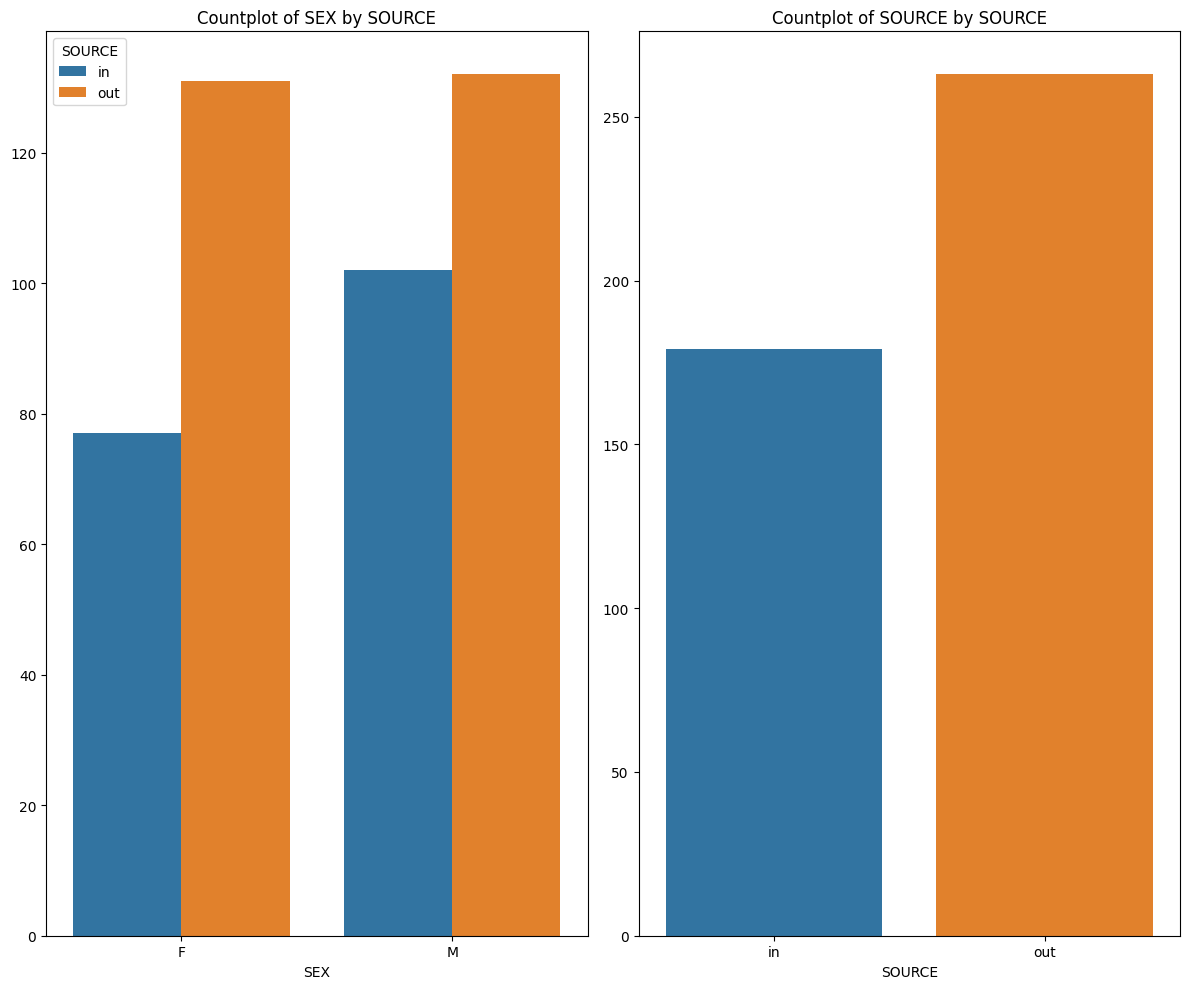

In [5]:
show_countplots_by_target(df_categorical, df_categorical.columns, "SOURCE")

In [6]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
HAEMATOCRIT,442.0,38.530317,6.099224,22.10,34.6000,38.900,42.900,69.00
HAEMOGLOBINS,442.0,12.860407,2.107344,6.00,11.5000,12.900,14.400,17.90
ERYTHROCYTE,442.0,4.556222,0.752741,2.46,4.1025,4.595,5.055,7.05
LEUCOCYTE,442.0,8.334163,4.455172,1.30,5.3000,7.300,10.275,40.90
THROMBOCYTE,442.0,254.624434,121.533770,12.00,182.0000,254.500,322.750,1121.00
MCH,442.0,28.364480,2.695412,15.50,27.3000,28.900,29.975,33.80
MCHC,442.0,33.412217,1.315143,26.10,32.9000,33.500,34.100,37.70
MCV,442.0,84.832353,6.859118,57.30,82.0250,85.500,88.800,100.80
AGE,442.0,45.067873,20.642402,1.00,29.2500,45.500,61.000,93.00


array([[<Axes: title={'center': 'HAEMATOCRIT'}>,
        <Axes: title={'center': 'HAEMOGLOBINS'}>,
        <Axes: title={'center': 'ERYTHROCYTE'}>],
       [<Axes: title={'center': 'LEUCOCYTE'}>,
        <Axes: title={'center': 'THROMBOCYTE'}>,
        <Axes: title={'center': 'MCH'}>],
       [<Axes: title={'center': 'MCHC'}>,
        <Axes: title={'center': 'MCV'}>, <Axes: title={'center': 'AGE'}>]],
      dtype=object)

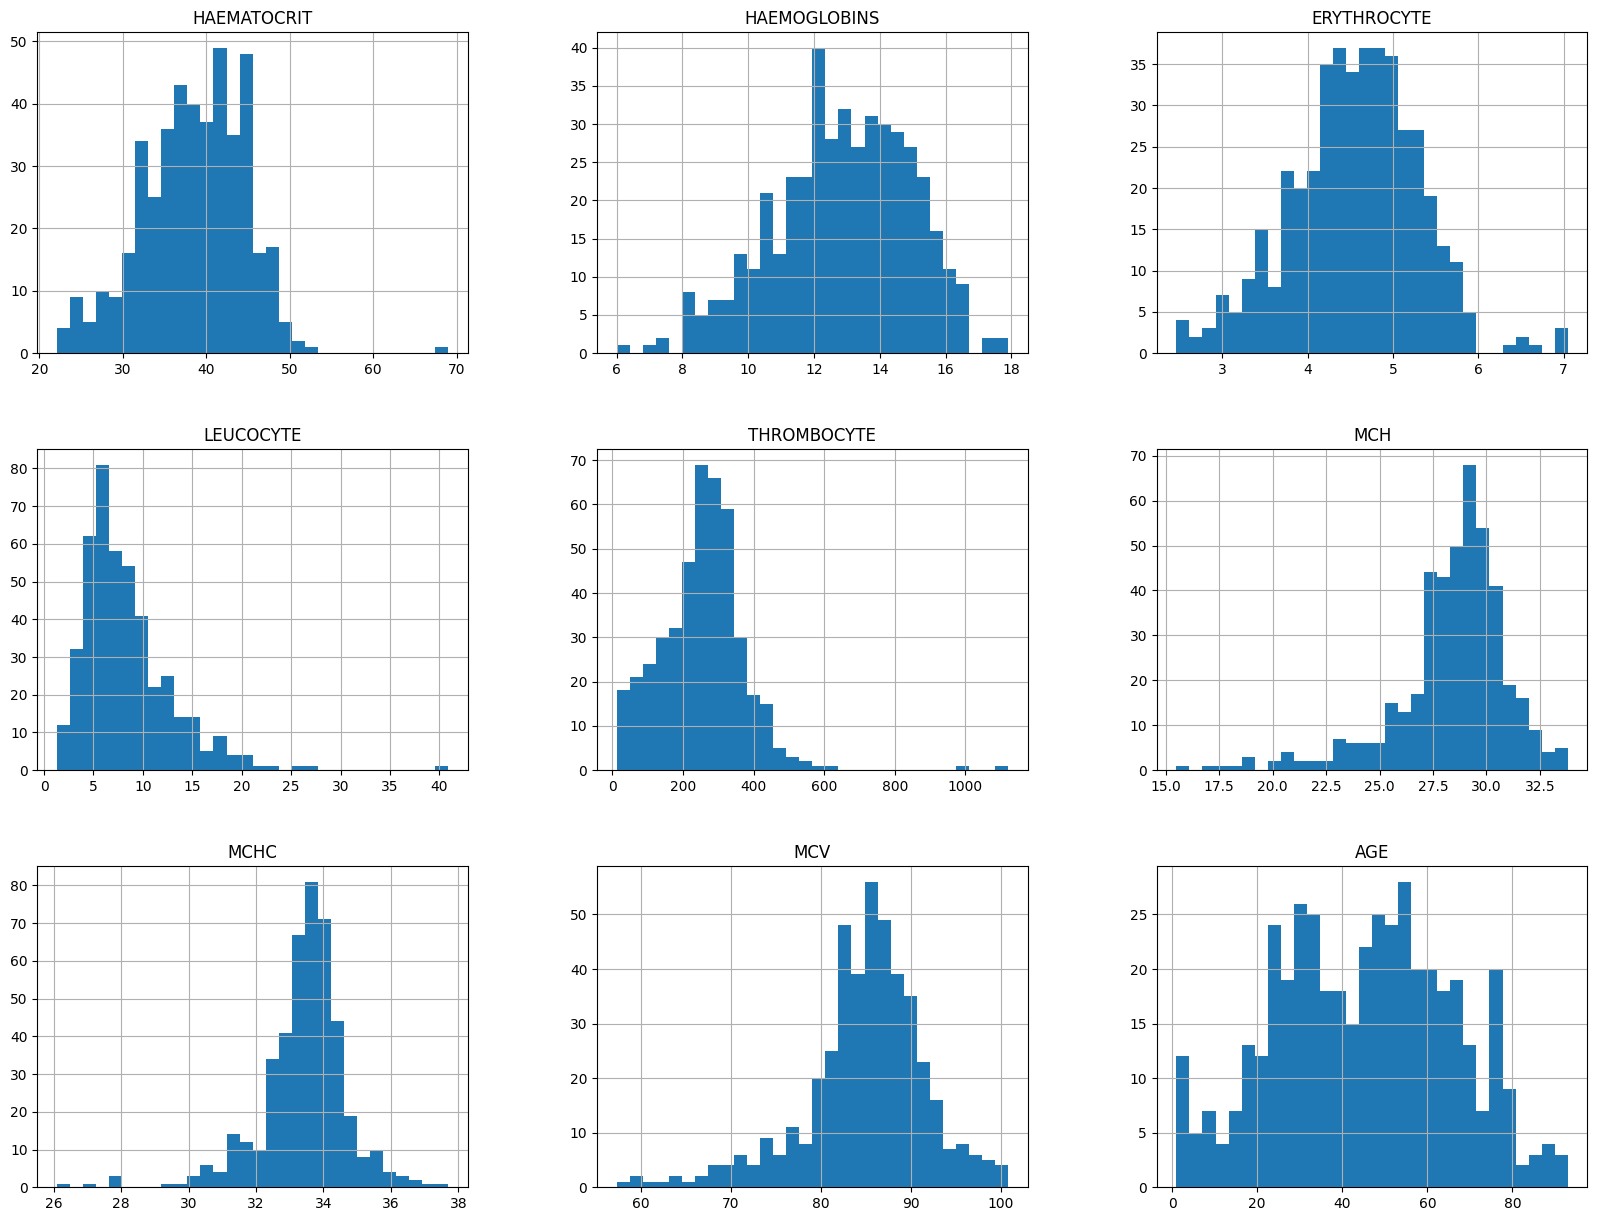

In [7]:
df_numerical.hist(bins=30, figsize=(20,15))

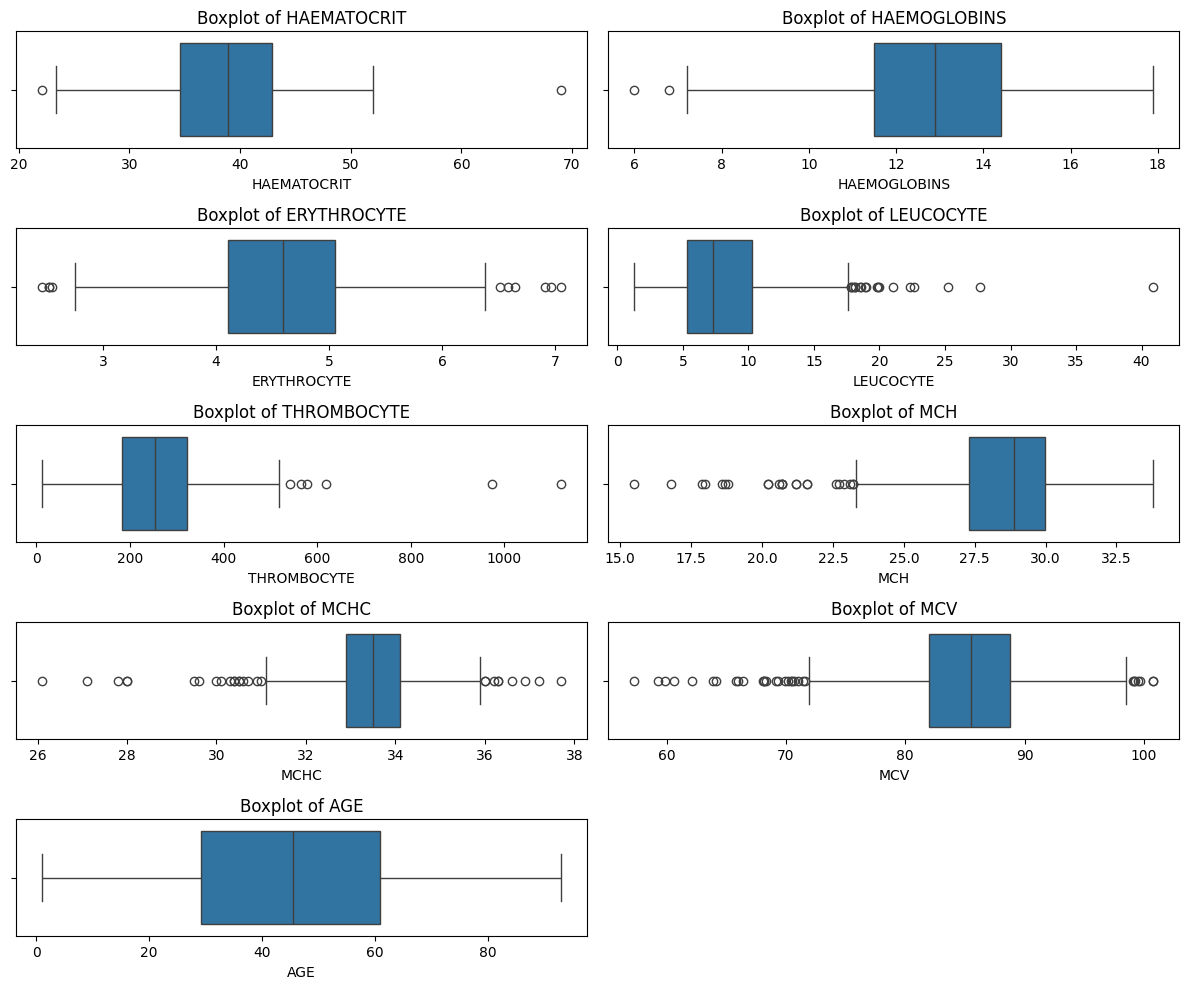

In [8]:
create_boxplots_from_df(df_numerical)

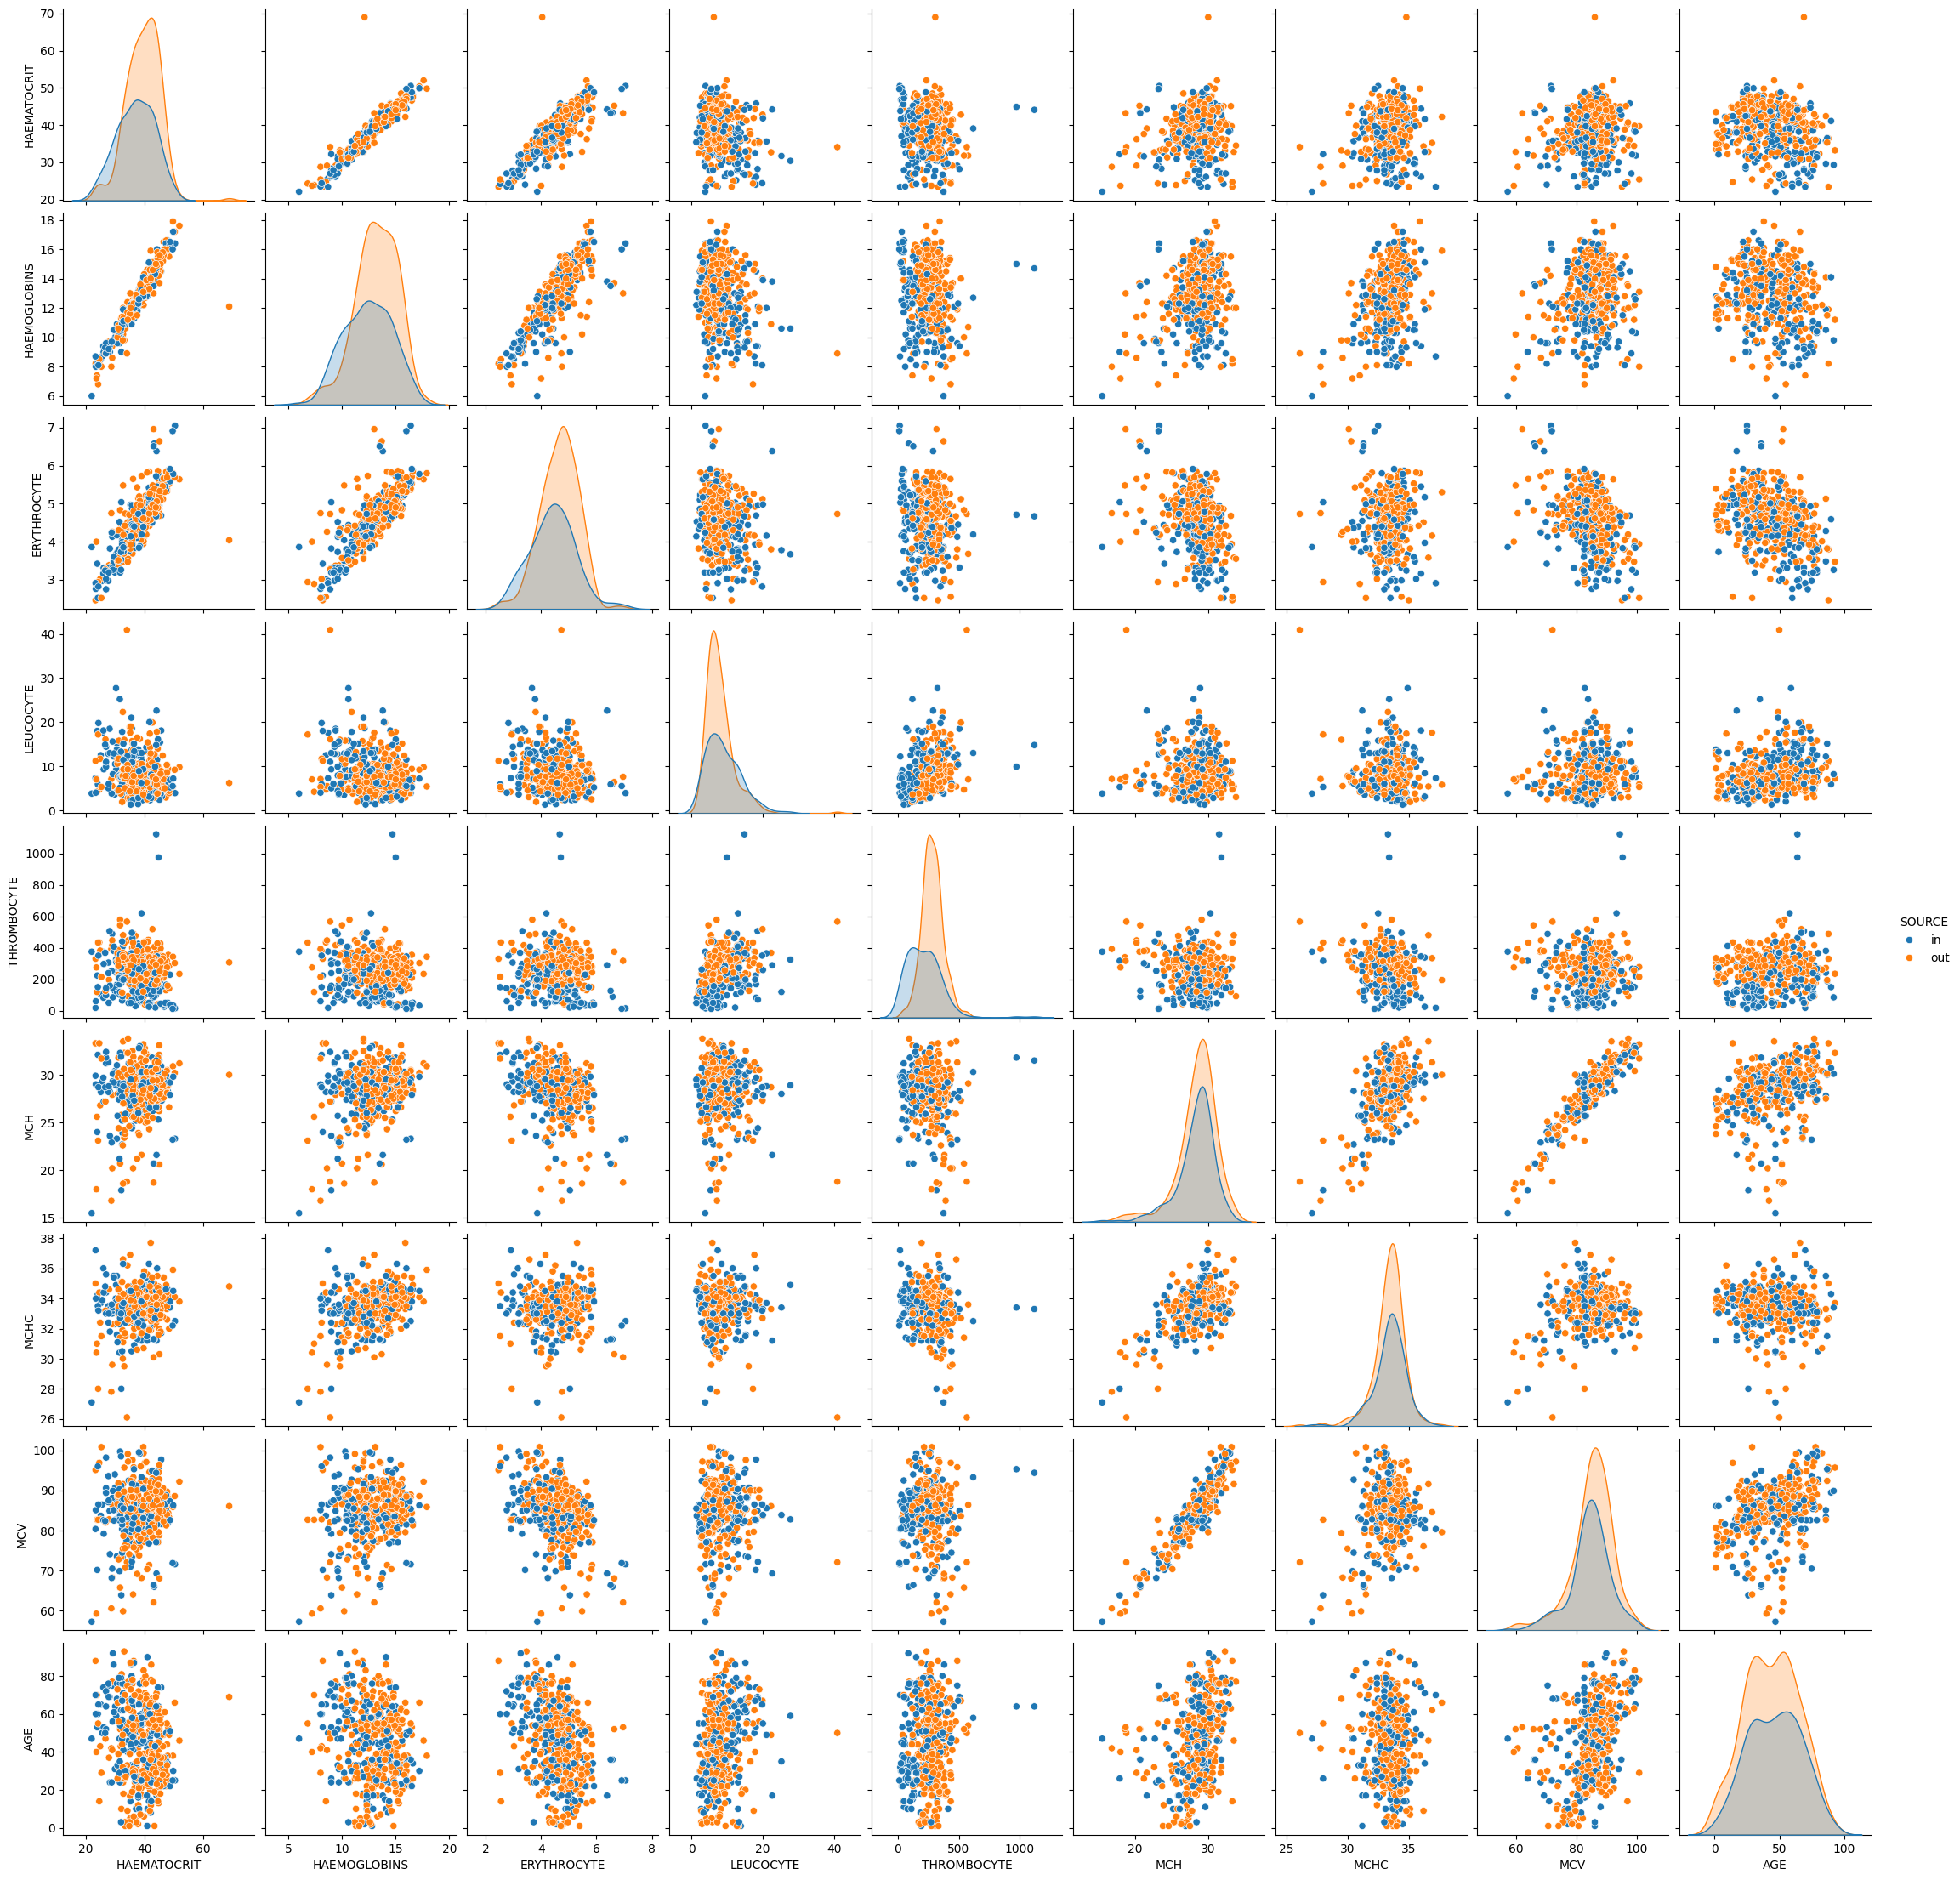

In [9]:
sns.pairplot(df_validation, hue='SOURCE')

In [10]:
numerical_correlation_mt = df_numerical.corr()
numerical_correlation_mt

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
HAEMATOCRIT,1.000000,0.943292,0.829443,-0.217202,-0.077684,0.170717,0.171228,0.126569,-0.185836
HAEMOGLOBINS,0.943292,1.000000,0.813141,-0.227220,-0.127873,0.285881,0.370937,0.171983,-0.205356
ERYTHROCYTE,0.829443,0.813141,1.000000,-0.197383,-0.073982,-0.312499,0.005869,-0.380679,-0.375883
LEUCOCYTE,-0.217202,-0.227220,-0.197383,1.000000,0.344417,-0.049820,-0.091886,-0.016987,0.212669
THROMBOCYTE,-0.077684,-0.127873,-0.073982,0.344417,1.000000,-0.105049,-0.221715,-0.026997,0.125146
MCH,0.170717,0.285881,-0.312499,-0.049820,-0.105049,1.000000,0.602011,0.925853,0.303620
MCHC,0.171228,0.370937,0.005869,-0.091886,-0.221715,0.602011,1.000000,0.259075,-0.037710
MCV,0.126569,0.171983,-0.380679,-0.016987,-0.026997,0.925853,0.259075,1.000000,0.378908
AGE,-0.185836,-0.205356,-0.375883,0.212669,0.125146,0.303620,-0.037710,0.378908,1.000000


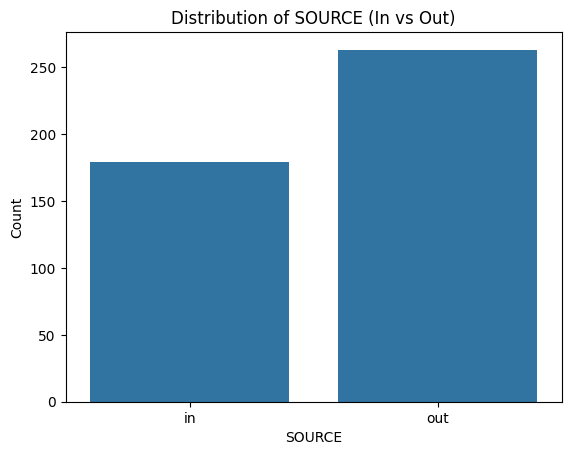

In [11]:
sns.countplot(x=df_validation['SOURCE'])
plt.title("Distribution of SOURCE (In vs Out)")
plt.xlabel("SOURCE")
plt.ylabel("Count")
plt.show()

In [12]:
source_counts = df_validation['SOURCE'].value_counts()
source_proportions = df_validation['SOURCE'].value_counts(normalize=True)
print("Counts of 'SOURCE':\n", source_counts)
print("\nProportions of 'SOURCE':\n", source_proportions)

Counts of 'SOURCE':
 SOURCE
out    263
in     179
Name: count, dtype: int64

Proportions of 'SOURCE':
 SOURCE
out    0.595023
in     0.404977
Name: proportion, dtype: float64
